# Homework chapter 9: Statistical and machine learning for marketing 

## Exercise 1 

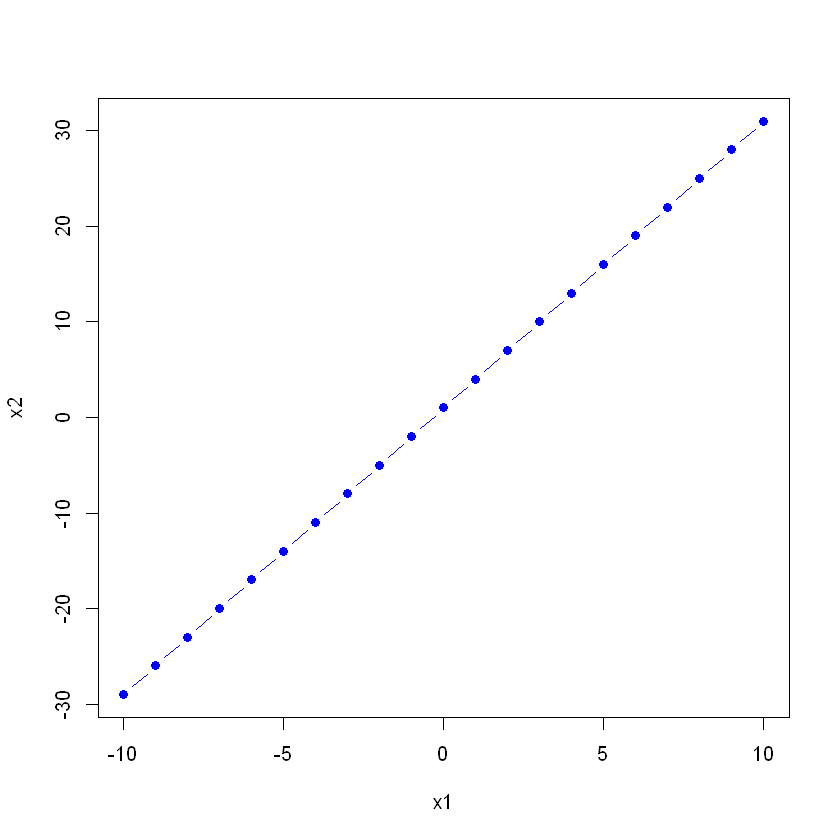

In [2]:
#a)
# hyperplane: 1+3X1 -X2 =0 
x1 <- -10:10
x2 <- 1+ (3*x1)
plot(x1, x2, type = "b", pch = 19, 
     col = "blue", xlab = "x1", ylab = "x2")

#1+3X1-X2 <0  ----> X2 < X1
#1+3X1 -X2 > 0 ----> X1 > X2 


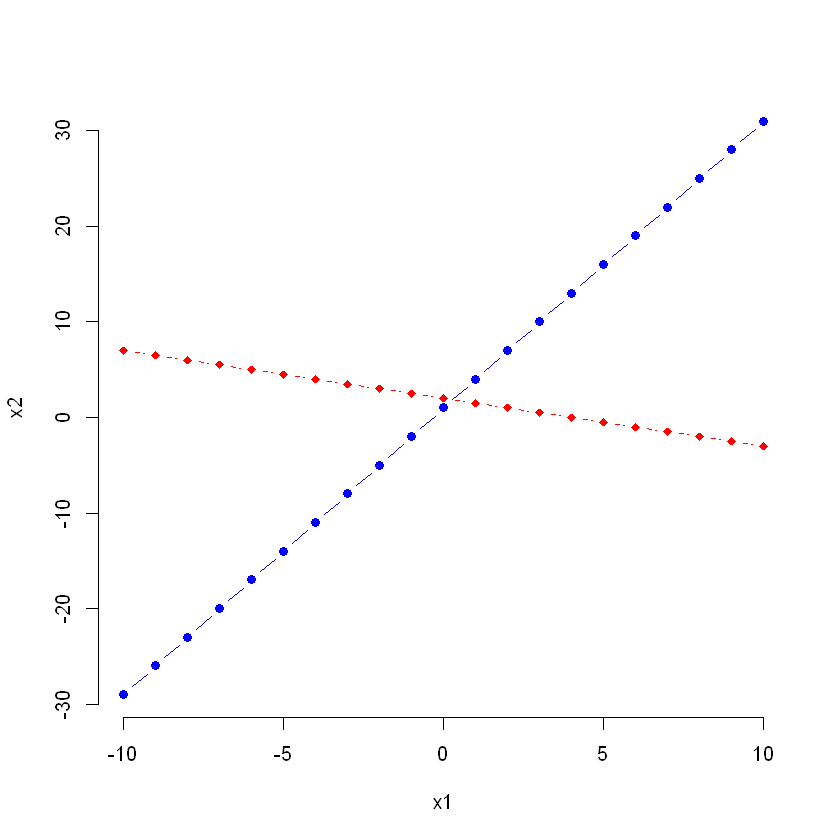

In [3]:
#b)
x3 <- 2-x1/2
# Create a first line
plot(x1, x2, type = "b", frame = FALSE, pch = 19, 
     col = "blue", xlab = "x1", ylab = "x2")
# Add a second line
lines(x1, x3, pch = 18, col = "red", type = "b", lty = 2)
#-2 + X1 +2X2 < 0 


## Exercise 2

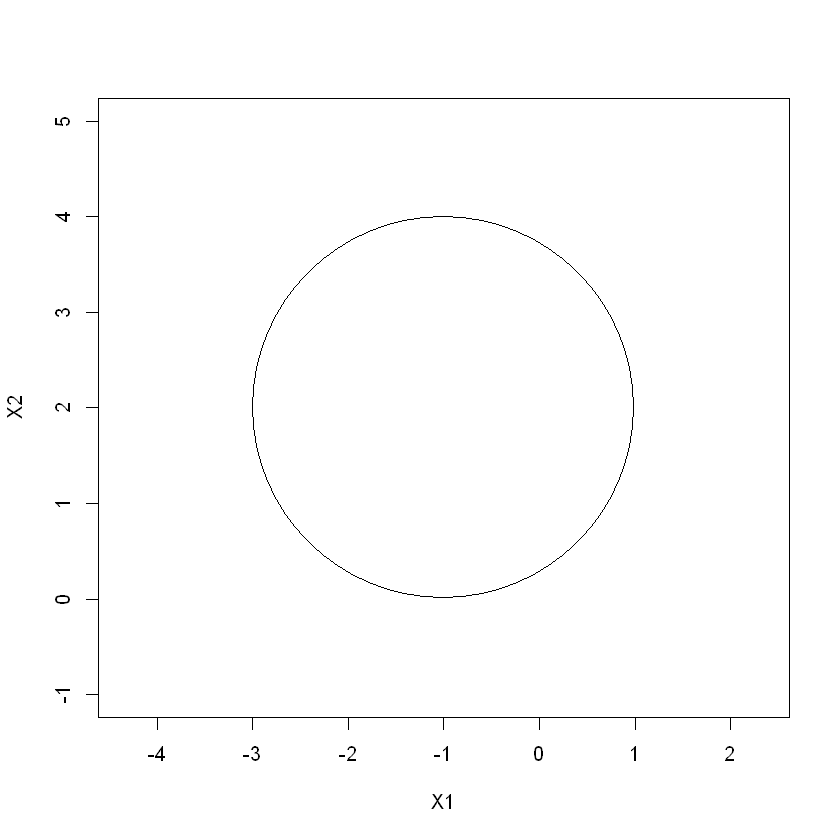

In [1]:

#a
rad = 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(rad), add = TRUE, inches = FALSE)

## Exercise 4

Warning message:
"package 'e1071' was built under R version 3.6.2"

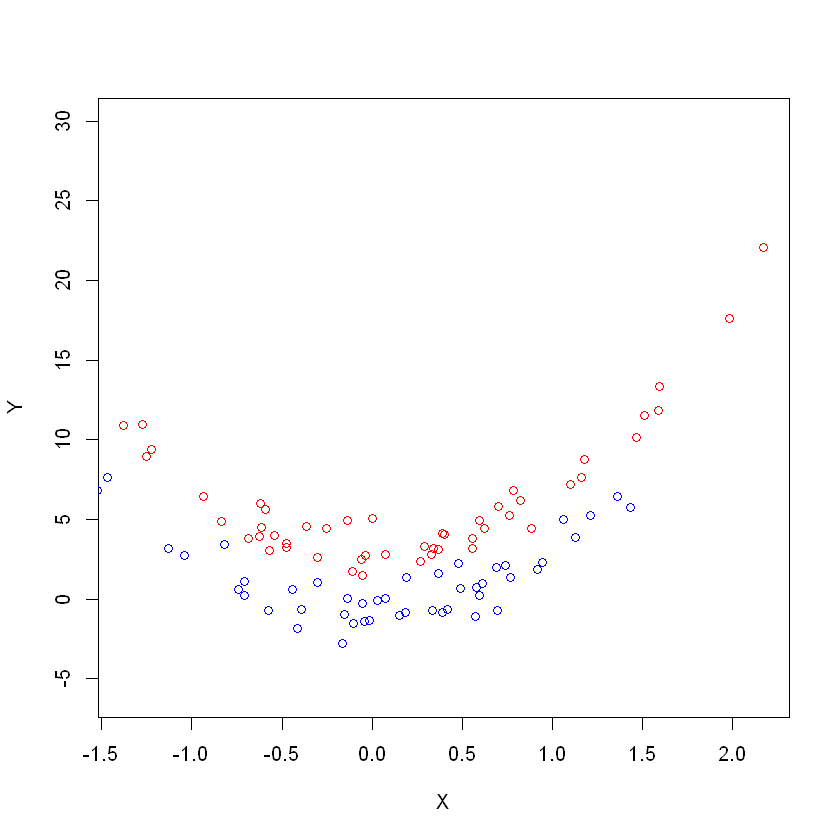

In [4]:
library(e1071)
set.seed(1)
x <- rnorm(100)
y <- 4 * x^2 + 1 + rnorm(100)
class <- sample(100, 50)
y[class] <- y[class] + 2
y[-class] <- y[-class] - 2
plot(x[class], y[class], col = "red", xlab = "X", ylab = "Y", ylim = c(-6, 30))
points(x[-class], y[-class], col = "blue")

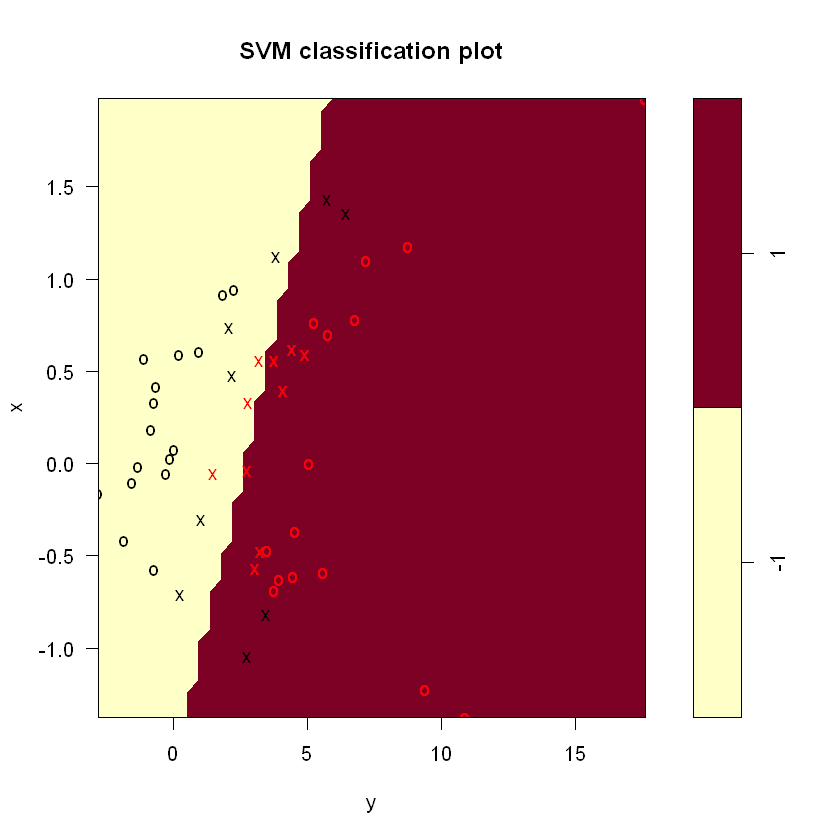

In [5]:
z <- rep(-1, 100)
z[class] <- 1
data <- data.frame(x = x, y = y, z = as.factor(z))
train <- sample(100, 50)
data.train <- data[train, ]
data.test <- data[-train, ]
svm.linear <- svm(z ~ ., data = data.train, kernel = "linear", cost = 10)
plot(svm.linear, data.train)

In [6]:
#confusion matrix
table(predict = predict(svm.linear, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 21  3
     1   4 22

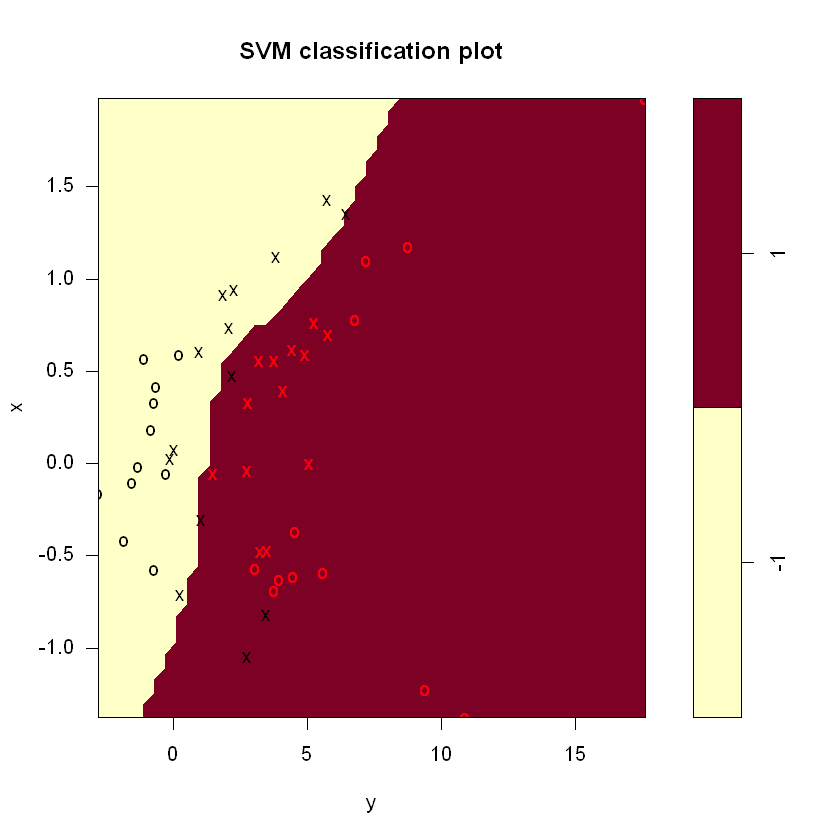

In [7]:
#now with a polynomial kernel
svm.polinomial <- svm(z ~ ., data = data.train, kernel = "polynomial", cost = 10)
plot(svm.polinomial, data.train)

In [8]:
#confusion matrix using polynomial kernel 
table(predict = predict(svm.polinomial, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 20  0
     1   5 25

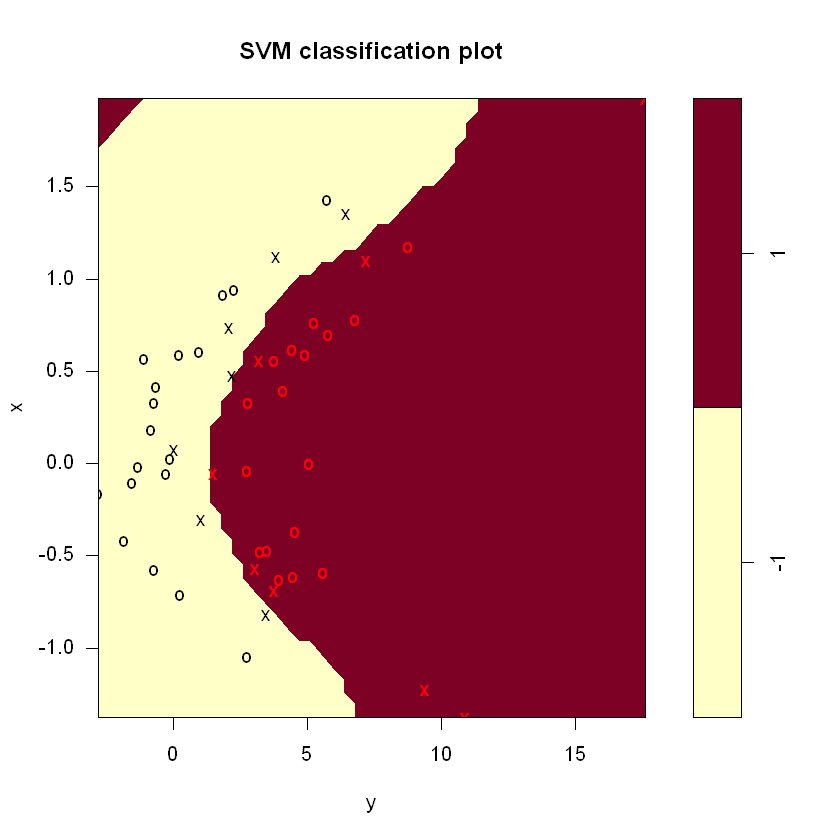

In [9]:
#now using a radial kernel
svm.radial <- svm(z ~ ., data = data.train, kernel = "radial", gamma = 1, cost = 10)
plot(svm.radial, data.train)

In [10]:
#confusion matrix of the svm radial kernel 
table(predict = predict(svm.radial, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 24  0
     1   1 25

[1] 0.42

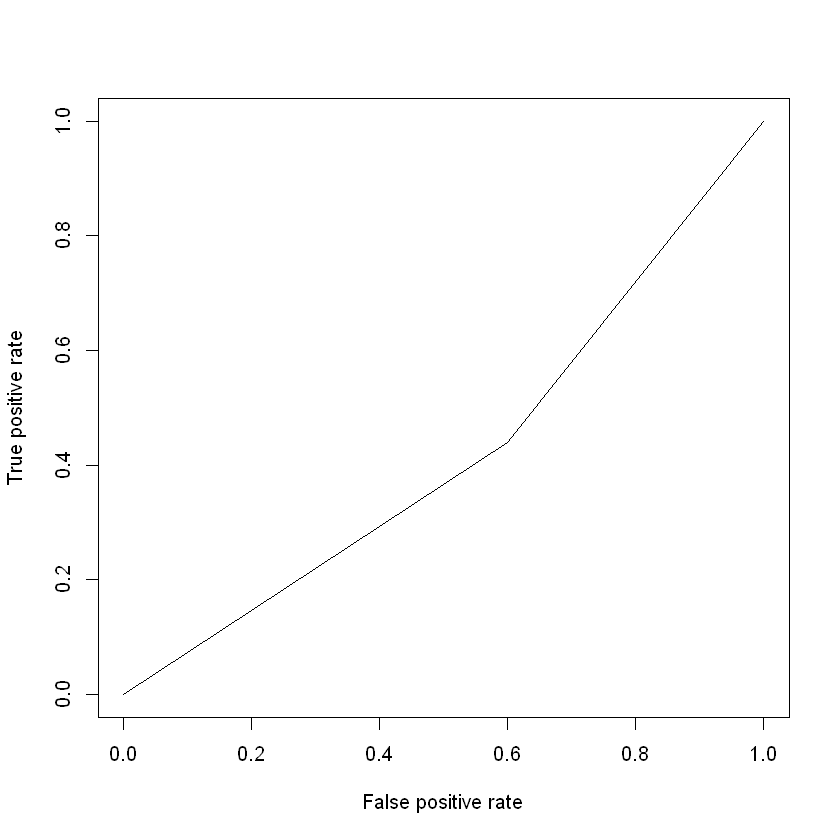

In [47]:
#now we see the performance in the test data set using the AUC score
prediction_test_linear <- predict(svm.linear, data=data.test)
library(ROCR)
pred_linear <- prediction(as.numeric(prediction_test_linear),as.numeric(data.test$z))
perf_linear<- performance(pred_linear, 'tpr','fpr')
#plot(perf_linear, colorize = TRUE, text.adj = c(train.4-0.2,1.7))
plot(perf_linear)

auc <- performance(pred_linear, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.46

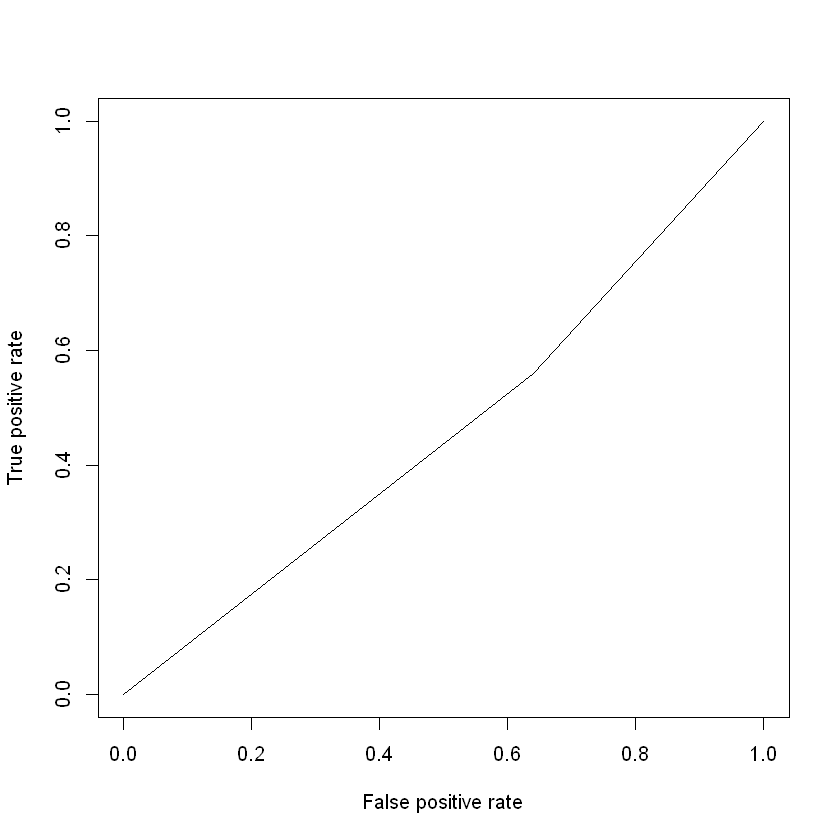

In [49]:
#polynomial AUC
prediction_test_polynomial<- predict(svm.polinomial)
library(ROCR)
pred_poly <- prediction(as.numeric(prediction_test_polynomial),as.numeric(data.test$z))
perf_poly<- performance(pred_poly, 'tpr','fpr')
#plot(perf_linear, colorize = TRUE, text.adj = c(train.4-0.2,1.7))
plot(perf_poly)

auc <- performance(pred_poly, measure = "auc")
auc <- auc@y.values[[1]]
auc


[1] 0.46

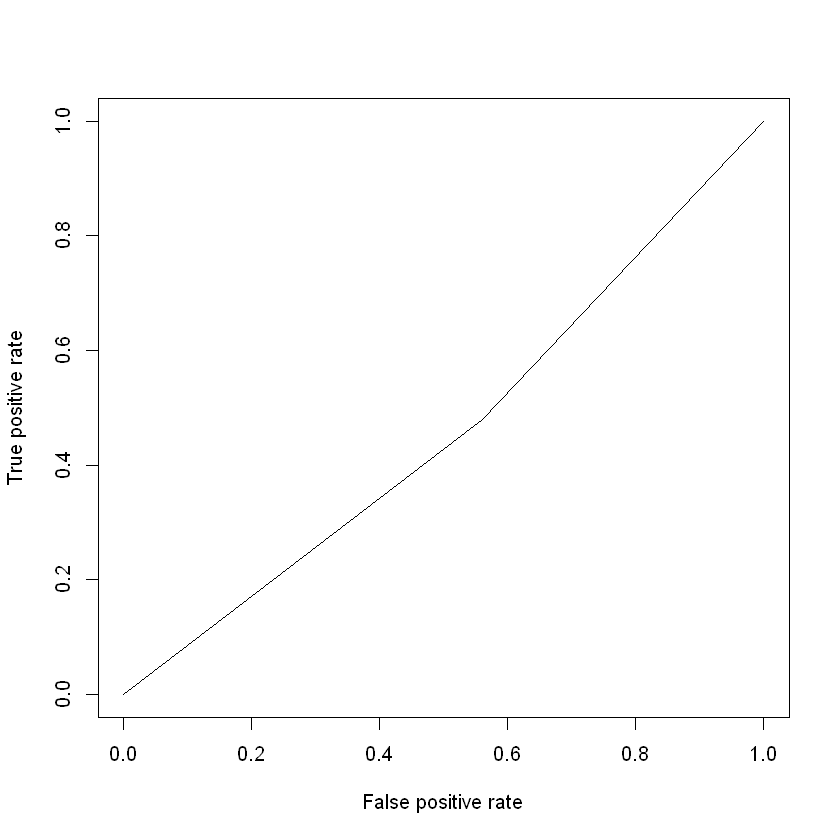

In [51]:
#radial confusion matrix
prediction_test_radial <- predict(svm.radial)
library(ROCR)
pred_radial <- prediction(as.numeric(prediction_test_radial),as.numeric(data.test$z))
perf_radial<- performance(pred_radial, 'tpr','fpr')
#plot(perf_linear, colorize = TRUE, text.adj = c(train.4-0.2,1.7))
plot(perf_radial)

auc <- performance(pred_radial, measure = "auc")
auc <- auc@y.values[[1]]
auc

#In the test set the svms with the biggest AUC's are the ones of radial and polynomial.

## Exercise 7

In [2]:
#a)
library(ISLR)
data(Auto)

bin_var <- ifelse(Auto$mpg >median(Auto$mpg),1,0)



Warning message:
"package 'ISLR' was built under R version 3.6.2"

In [7]:
#b)

library(e1071)
tune_out = tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 
    0.1, 1, 5, 10, 100)))
summary(tune_out)

ERROR: Error in mpg$level: $ operator is invalid for atomic vectors


In [4]:
#c
tune_out = tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.1, 
    1, 5, 10), degree = c(2, 3, 4)))
summary(tune_out)

ERROR: Error in eval(predvars, data, env): object 'mpglevel' not found


In [5]:
tune_out = tune(svm, mpglevel ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.1, 
    1, 5, 10), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune_out)

ERROR: Error in eval(predvars, data, env): object 'mpglevel' not found


In [6]:
#d
svm.linear = svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly = svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 10, 
    degree = 2)
svm.radial = svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 10, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)

ERROR: Error in eval(predvars, data, env): object 'mpglevel' not found


## Exercise 8 

In [8]:
#a
library(ISLR)
train_split = sample(dim(OJ)[1], 800)
train = OJ[train_split, ]
test = OJ[-train_split, ]

In [9]:
#b
library(e1071)
svm.linear = svm(Purchase ~ ., kernel = "linear", data = train, cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  439

 ( 219 220 )


Number of Classes:  2 

Levels: 
 CH MM




In [10]:
#c
train_pred = predict(svm.linear, train)
tab <- table(train$Purchase, train_pred)
tab
print("Error:")
(tab[2] + tab[3]) / sum(tab)

    train_pred
      CH  MM
  CH 440  55
  MM  79 226

[1] "Error:"


[1] 0.1675

In [11]:
test_pred = predict(svm.linear, test)
tab <- table(test$Purchase, test_pred)

tab
print("Error:")
(tab[2] + tab[3]) / sum(tab)

    test_pred
      CH  MM
  CH 143  15
  MM  27  85

[1] "Error:"


[1] 0.1555556

In [12]:
#f
svm.radial = svm(Purchase ~ ., data = train, kernel = "radial")
summary(svm.radial)

train.pred = predict(svm.radial, train)
tab <- table(train$Purchase, train.pred)

tab
print("Error:")
(tab[2] + tab[3]) / sum(tab)


Call:
svm(formula = Purchase ~ ., data = train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  380

 ( 193 187 )


Number of Classes:  2 

Levels: 
 CH MM




    train.pred
      CH  MM
  CH 448  47
  MM  82 223

[1] "Error:"


[1] 0.16125

In [13]:
#g
svm.poly = svm(Purchase ~ ., data = train, kernel = "poly", degree = 2)
summary(svm.poly)

train.pred = predict(svm.poly, train)
tab <- table(train$Purchase, train.pred)

tab
print("Error:")
(tab[2] + tab[3]) / sum(tab)


Call:
svm(formula = Purchase ~ ., data = train, kernel = "poly", degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  455

 ( 231 224 )


Number of Classes:  2 

Levels: 
 CH MM




    train.pred
      CH  MM
  CH 462  33
  MM 118 187

[1] "Error:"


[1] 0.18875

In [14]:
#h) Radial kernel has lowest error in both train and test.